# using InceptionV3

In [2]:
import keras

In [5]:
from keras.layers import Dense,Input,Lambda,Flatten
from keras.models import Model,Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob

In [8]:
# set and Resize the images 
Image_size=[224,224]
train_path='Data/train'
test_path='Data/test'

In [10]:
# using InceptionV3 
inception = InceptionV3(input_shape=Image_size+[3],weights='imagenet',include_top=False)

87924736/87910968 [==============================] - 153s 2us/step


In [11]:
# for not letting or model again train existing weights
for layer in inception.layers:
    layer.trainable = False

In [13]:
folders = glob('Data/train/*')

In [14]:
x = Flatten()(inception.output)

In [15]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [16]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
training_set = train_datagen.flow_from_directory('Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 800 images belonging to 4 classes.


In [20]:
test_set = test_datagen.flow_from_directory('Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 80 images belonging to 4 classes.


In [21]:
# fitting the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\Owner\anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
25/25 [==============================] - 78s 2s/step - loss: 4.4034 - accuracy: 0.5203 - val_loss: 1.0910 - val_accuracy: 0.8250
Epoch 2/20
25/25 [==============================] - 37s 1s/step - loss: 1.0119 - accuracy: 0.8911 - val_loss: 0.5105 - val_accuracy: 0.9125
Epoch 3/20
25/25 [==============================] - 37s 1s/step - loss: 0.3688 - accuracy: 0.9350 - val_loss: 0.9877 - val_accuracy: 0.9250
Epoch 4/20
25/25 [==============================] - 36s 1s/step - loss: 0.1570 - accuracy: 0.9626 - val_loss: 0.3943 - val_accuracy: 0.9500
Epoch 5/20
25/25 [==============================] - 36s 1s/step - loss: 0.2082 - accuracy: 0.9518 - val_loss: 0.9439 - val_accuracy: 0.9125
Epoch 6/20
25/25 [==============================] - 36s 1s/step - loss: 0.1421 - accuracy: 0.9561 - val_loss: 0.5098 - val_accuracy: 0.9375
Epoch 7/20
25/25 [==============================] - 36s 1s/step - loss: 0.1965 - accuracy: 0.9597 - val_loss: 0.3728 - val_accuracy: 0.9250
Epoch 8/20
25/25 [==

In [22]:
import matplotlib.pyplot as plt

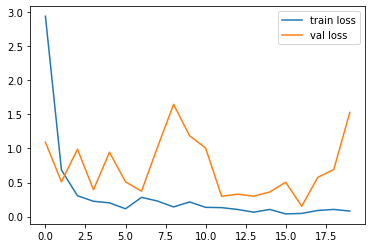

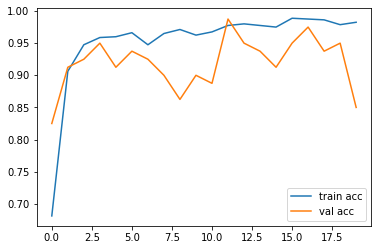

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [24]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')